## Deep Learning: Heart Disease Prediction Using ANN model

#### Background:
The healthcare orgnaizations have huge amounts of health related information to analyse the related factors and information to make an effective decision.but unfortunately it is not “mined” to dicover the hidden relationship between the data and how it effect causes of serious diseases. In our digital world having an effective analysis system, using medical records and data such as age, obesity, blood pressure etc, it can predict the possibility of patients developing a heart disease. It enables massive knowledge, e.g. patterns, relationships between medical factors related to heart disease to help early diagnose and treatement.

Deep Learning is a technology that is inspired by the sturcture of the human brain in terms of consisting of multiple layers and multiple neurons. The network has an input layer, an output layer, and at least one hidden layer. The network take in the data and train them to learns from the data it receives and then make prediction based on that learning. There are many machine learning techniquessach as Naïve Bayes (NB), Decision Tree (DT), K Nearset Neighbour,Support Vector Machine and Artificial Neural Network (ANN) which have been widely used for heart diseases prediction purposes. In this report we will implement a prediction of heart disease based on data from a region presenting a high risk of developing it using artificial neural network (ANN) which is simply consists of numerous neural layers that are used to make predictions.

#### Description of data: 

There are approximately two controls per coronary heart disease  (CHD) case. Many men with coronary heart disease have undergone blood pressure-lowering treatment and other programs to reduce their risk factors after their onset. In some cases, measurements were taken after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.
##### In the dataset, we have 10 attributes 
	
- V1: sbp (Systolic blood pressure) 
- V2: tobacco (Cumulative tobacco consumption)
- V3: ldl (Low density lipoprotein (LDL-cholesterol))
- V4: adiposity 
- V5: famhist (Family history of heart disease)
- V6: type (type-A behavior)
- V7: obesity
- V8: alcohol (Current alcohol consumption)
- V9: age
- Class: chd (coronary heart disease)

### Data preparation 

##### We will be using some Python libraries, such as pandas, NumPy, and matplotlib. For the deep learning, we will be using sklearn and Keras.

In [46]:
# Importing primary libraries
import pandas as pd    # pandas useful for reading the data and creating dataframe and structured tables
import numpy as np      #numpy library is used to make 
import seaborn as sns
import matplotlib.pyplot as plt # for plotting the data
from sklearn.preprocessing import LabelEncoder # for coverting the data to numerical format
from sklearn.preprocessing import MinMaxScaler # scalling the data
from sklearn.model_selection import train_test_split  # sklrean library will help us spiltting our data into train and test sets
from keras.models import Sequential
from keras.layers import Dense #for adding the hidden layers
import keras
from sklearn.neural_network import MLPClassifier
# importing confusion matrix, accuracy and precision will help us evalute our used model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
 

In [47]:
data = pd.read_csv('phpgNaXZe.csv')
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


As we can notice the attributes does not have proper names so we will make changes to give them appropriate names as follows

In [48]:
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']
data.columns=column
data.head(10)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,1
6,142,4.05,3.38,16.20,2,59,20.81,2.62,38,1
7,114,4.08,4.59,14.60,1,62,23.11,6.72,58,2
8,114,0.00,3.83,19.40,1,49,24.86,2.49,29,1
9,132,0.00,5.80,30.96,1,69,30.11,0.00,53,2


### Data Processing
Although in the data description it state that the data is not missing any values and all of them are in a numericl format and do not include any null values, it is always good to check our dataset to make sure that we don’t have missing information. We do that as shown bellow

In [49]:
# Checking for any missing values 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   type       462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


Visualize the characteristics and statical measures of the attributes

In [50]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


Feature Scaling: noticing our data, the variation of our dataset values are very large, some values are 0,1 ,50 and some are 160 and that might casue difficulties in idenfying the relationship between the features when plotting and visualizing the data while applying machine learning models to see how the attributes affect the results. As we can see that clearly in the figure bellow

<AxesSubplot:>

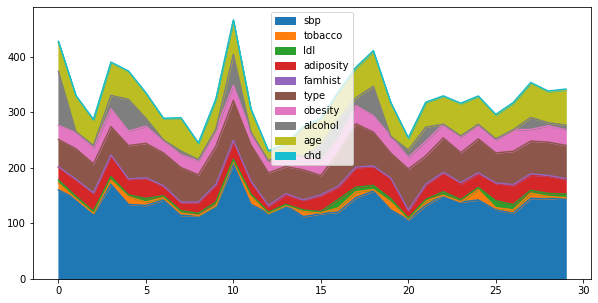

In [51]:
data.head(30).plot(kind='area',figsize=(10,5))

##### To solve the problem mentioned above we use scaling and fitting as shown bellow

In [52]:
# Feature Scaling, making categorical data precise 
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])
# setting scale of max min value for sbp in range of 0-100, 
scale = MinMaxScaler(feature_range =(0,100))
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))
data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


##### now we can see the differnce between pur data before scalling and after

In [53]:
data['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

<AxesSubplot:>

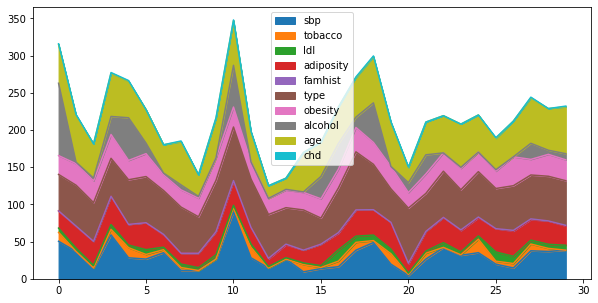

In [54]:
data.head(30).plot(kind='area',figsize=(10,5))

### spilting the data
Now that the data is ready we can spilt the data into training set of 80% and test set 20%

In [55]:
X = data.iloc[:,:9].values
y = data["chd"].values
#spilting the data unto training set of 80% and test set of 20%
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 )

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training and testing

##### Use the training set so the system can adjust the weights until the error is acceptably low as we can see below then test the network using the test set, and see how many it gets right


In [57]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 9, 
                     units = 8, kernel_initializer = "uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation = "relu", units = 9, 
                     kernel_initializer = "uniform"))
# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
# Compiling the ANN
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
# Fitting the ANN to the Training set
classifier.fit(X_train , y_train , epochs = 200  )

##Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.6504
Epoch 2/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.6531
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6531
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.6531
Epoch 5/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6531
Epoch 6/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6531
Epoch 7/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6531
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6531
Epoch 9/200
12/12 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.6531
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6558
Epoch 11/

##### A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model The matrix compares the actual values with those predicted by the model

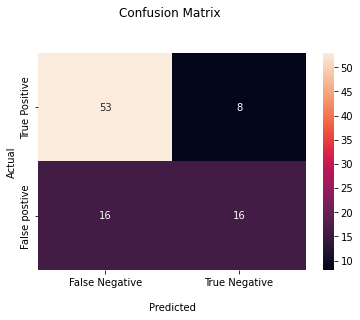

In [58]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#ploting the confusion matrix using the heatmap
ConHeatmap= sns.heatmap(cm,annot =True)
ConHeatmap.set_title('Confusion Matrix \n\n')
ConHeatmap.set_xlabel('\nPredicted')
ConHeatmap.set_ylabel('Actual')

ConHeatmap.xaxis.set_ticklabels(['False Negative','True Negative'])
ConHeatmap.yaxis.set_ticklabels(['True Positive','False postive'])
plt.show()


##### The objective of creating and plotting the confusion matrix is to check the accuracy and precision to help us evaluate the machine learning model.
- True Positive (TP): It refers to the number of predictions where the classifier correctly predicts the positive class as positive.
- True Negative (TN): It refers to the number of predictions where the classifier correctly predicts the negative class as negative.
- False Positive (FP): It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.
- False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

##### Accuracy: It gives you the overall accuracy of the model, meaning the fraction of the total samples that were correctly classified by the classifier. To calculate accuracy, use the following formula: (TP+TN)/(TP+TN+FP+FN).

##### Precision: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).

In [59]:
precision= cm[0][0]/(cm[0][0]+cm[1][1])
print(f' ANN precision is: ', precision *100)

 ANN precision is:  76.81159420289855


In [60]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(f' ANN accuracy is: ', accuracy *100)

 ANN accuracy is:  74.19354838709677



##### Refernces
Rabbi, M.F., Uddin, M.P., Ali, M.A., Kibria, M.F., Afjal, M.I., Islam, M.S. and Nitu, A.M., 2018. Performance evaluation of data mining classification techniques for heart disease prediction. American Journal of Engineering Research, 7(2), pp.278-283.

Palaniappan, S. and Awang, R., 2008, March. Intelligent heart disease prediction system using data mining techniques. In 2008 IEEE/ACS international conference on computer systems and applications (pp. 108-115). IEEE. 

Sahil Verma, 2018. heart disease prediction [Online]. Medium. Available at: blog.goodaudience.com/heart-disease-prediction-aa656f2db585 (Accessed: 14 May 2022).

Siddhardhan. (2021). Project 9. Heart Disease Prediction using Machine Learning with Python | Machine Learning Projects. [Online Video]. 2 April. Available from: https://www.youtube.com/watch?v=qmqCYC-MBQo. [Accessed: 20 May 2022].


(2020). Heart Disease Prediction using ANN [Online]. GeeksforGeeks. Available at: www.geeksforgeeks.org/heart-disease-prediction-using-ann/ (Accessed: 20 May 2022).